### Introduction

The basic principle of thermal power generation is: fuel generates steam by heating water during combustion, and the steam pressure drives the turbine to rotate, and then the turbine drives the generator to rotate to generate electricity. In this series of energy conversions, the core that affects the power generation efficiency is the combustion efficiency of the boiler, that is, the fuel burns to heat the water to generate high-temperature and high-pressure steam. There are many factors affecting the combustion efficiency of the boiler, including the adjustable parameters of the boiler, such as the combustion air supply, the primary and secondary air, the induced air, the return air, and the water supply; and the working conditions of the boiler, such as the bed temperature, bed pressure, furnace temperature, pressure, and superheater temperature.

### Data Description
- V0-V37: features
- target: the amount of steam produced

### import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

### Load data

In [2]:
train_data_file = "./train_data.txt"
test_data_file =  "./test_data.txt"

train_data = pd.read_csv(train_data_file, sep='\t')
test_data = pd.read_csv(test_data_file, sep='\t')

### show data

In [3]:
test_data.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.368,0.380,-0.225,-0.049,0.379,0.092,0.550,0.551,0.244,0.904,...,-0.449,0.047,0.057,-0.042,0.847,0.534,-0.009,-0.190,-0.567,0.388
1,0.148,0.489,-0.247,-0.049,0.122,-0.201,0.487,0.493,-0.127,0.904,...,-0.443,0.047,0.560,0.176,0.551,0.046,-0.220,0.008,-0.294,0.104
2,-0.166,-0.062,-0.311,0.046,-0.055,0.063,0.485,0.493,-0.227,0.904,...,-0.458,-0.398,0.101,0.199,0.634,0.017,-0.234,0.008,0.373,0.569
3,0.102,0.294,-0.259,0.051,-0.183,0.148,0.474,0.504,0.010,0.904,...,-0.456,-0.398,1.007,0.137,1.042,-0.040,-0.290,0.008,-0.666,0.391
4,0.300,0.428,0.208,0.051,-0.033,0.116,0.408,0.497,0.155,0.904,...,-0.458,-0.776,0.291,0.370,0.181,-0.040,-0.290,0.008,-0.140,-0.497


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

This training set data has a total of 2888 samples, with 38 feature variables V0-V37, all of which are numerical types, and there is no missing data for all data features; the data fields have been desensitized and the specific meanings of the feature data have been deleted.

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      1925 non-null   float64
 1   V1      1925 non-null   float64
 2   V2      1925 non-null   float64
 3   V3      1925 non-null   float64
 4   V4      1925 non-null   float64
 5   V5      1925 non-null   float64
 6   V6      1925 non-null   float64
 7   V7      1925 non-null   float64
 8   V8      1925 non-null   float64
 9   V9      1925 non-null   float64
 10  V10     1925 non-null   float64
 11  V11     1925 non-null   float64
 12  V12     1925 non-null   float64
 13  V13     1925 non-null   float64
 14  V14     1925 non-null   float64
 15  V15     1925 non-null   float64
 16  V16     1925 non-null   float64
 17  V17     1925 non-null   float64
 18  V18     1925 non-null   float64
 19  V19     1925 non-null   float64
 20  V20     1925 non-null   float64
 21  V21     1925 non-null   float64
 22  

The test set data has a total of 1925 samples, with 38 feature variables V0-V37, all of which are numerical types.

### summary statistics

In [6]:
train_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


the above data shows the statistical information of the data, such as the number of samples, the mean of the data, the standard deviation, the minimum value, the maximum value, etc.

In [7]:
train_data.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384


### boxplot for data exploration

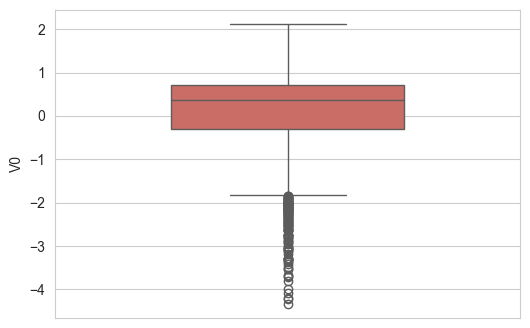

In [8]:
fig = plt.figure(figsize=(6, 4))  # set the width and height of the drawing object
sns.boxplot(train_data['V0'],width=0.5,palette="hls")  # boxplot
plt.show()

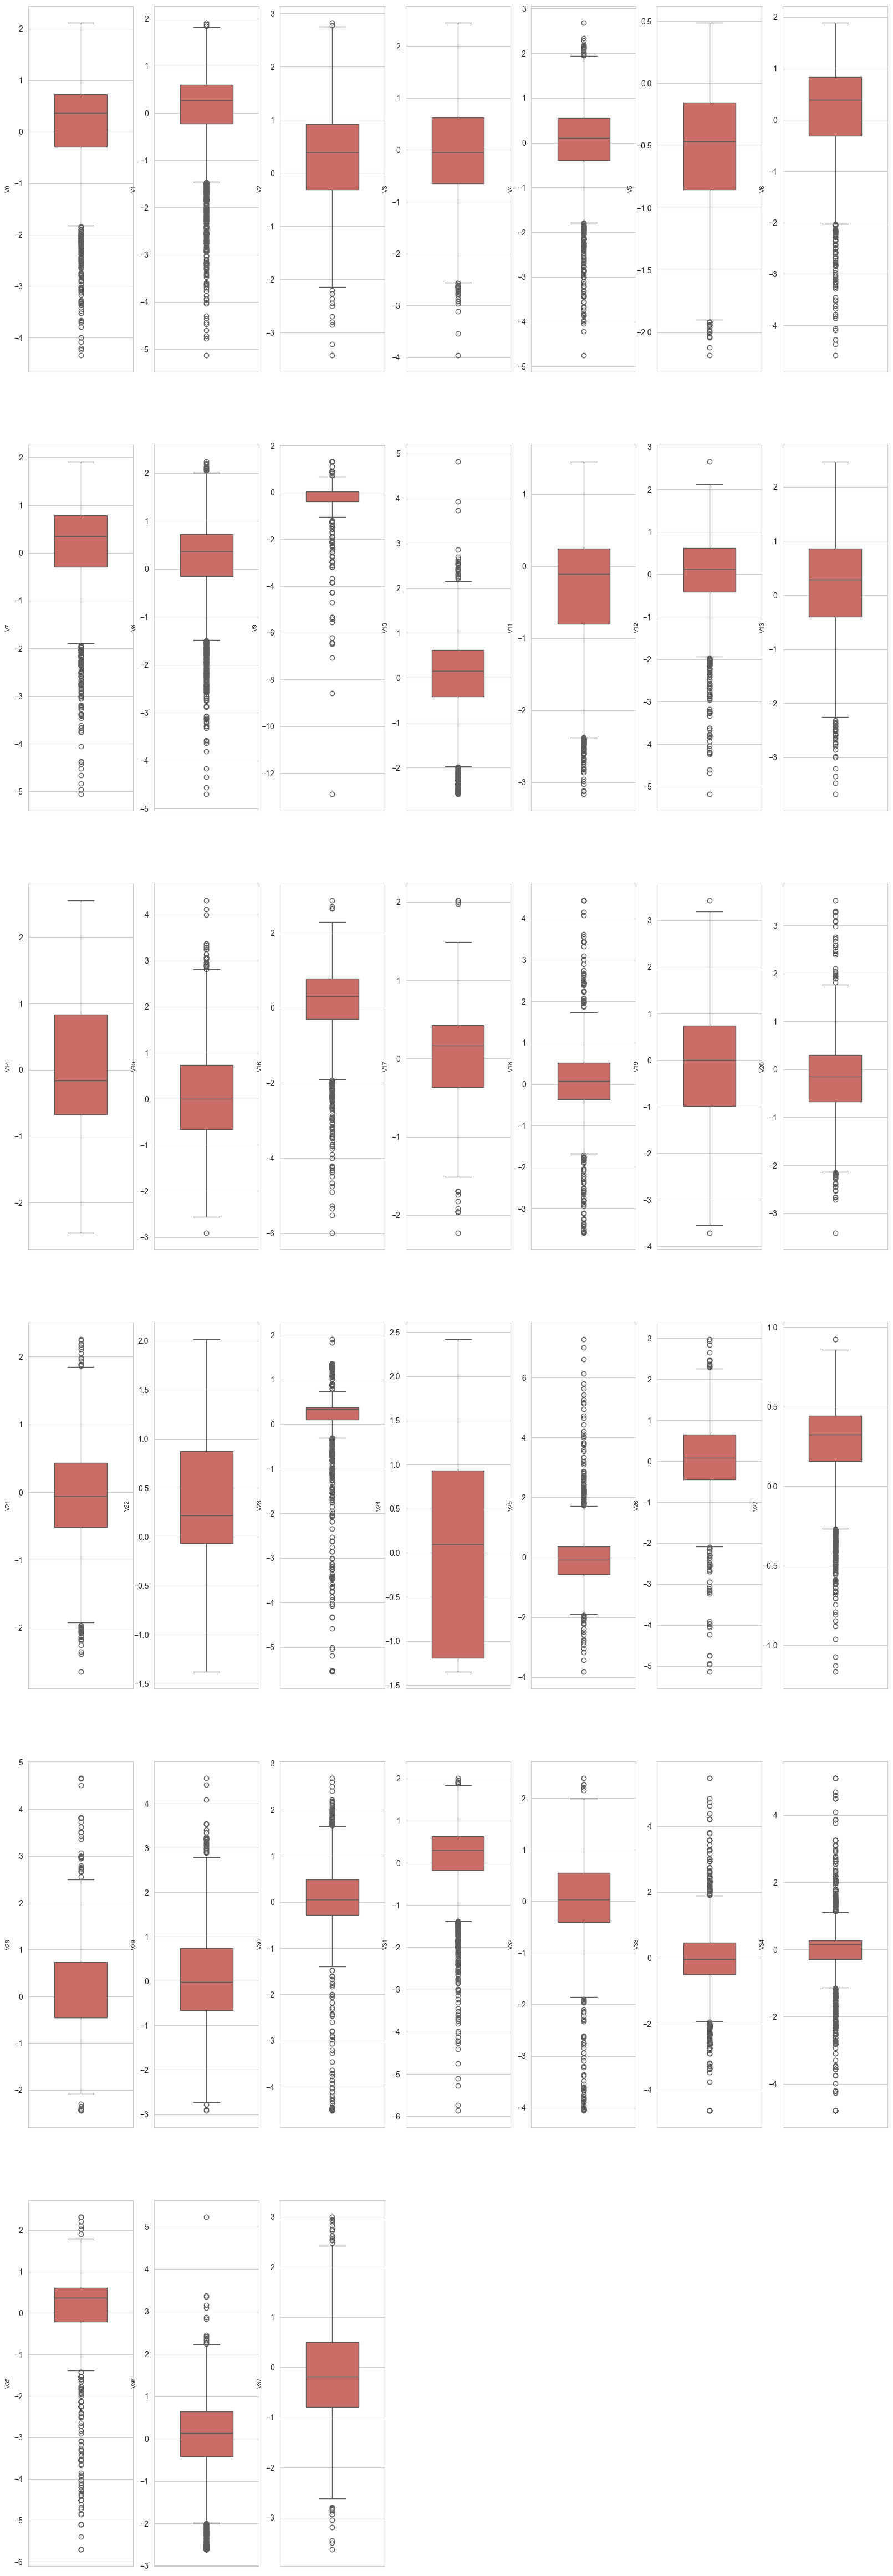

In [9]:
column = train_data.columns.tolist()[:39]  # columns
plt.figure(figsize=(20, 60))  # set the width and height of the drawing object
for i in range(38):
    plt.subplot(6, 7, i + 1)  # 13 rows and 3 columns
    sns.boxplot(train_data[column[i]], width=0.5, palette="hls")  # boxplot
    plt.ylabel(column[i], fontsize=8)

### check the distribution of the data

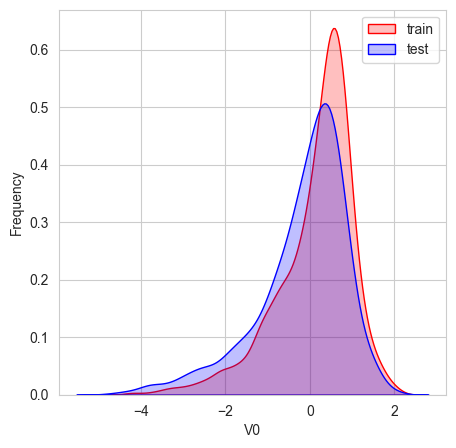

In [10]:
plt.figure(figsize=(5,5))
sns.kdeplot(train_data['V0'], color="Red", shade=True)
sns.kdeplot(test_data['V0'], color="Blue", shade=True)
plt.xlabel('V0')
plt.ylabel("Frequency")
plt.legend(["train","test"])
plt.show()

check all feature variables, the distribution of the training set data and the test set data, analyze and find the feature variables with inconsistent data distribution.

In [11]:
10//3 + 1

4

In [12]:
38//6 + 1

7

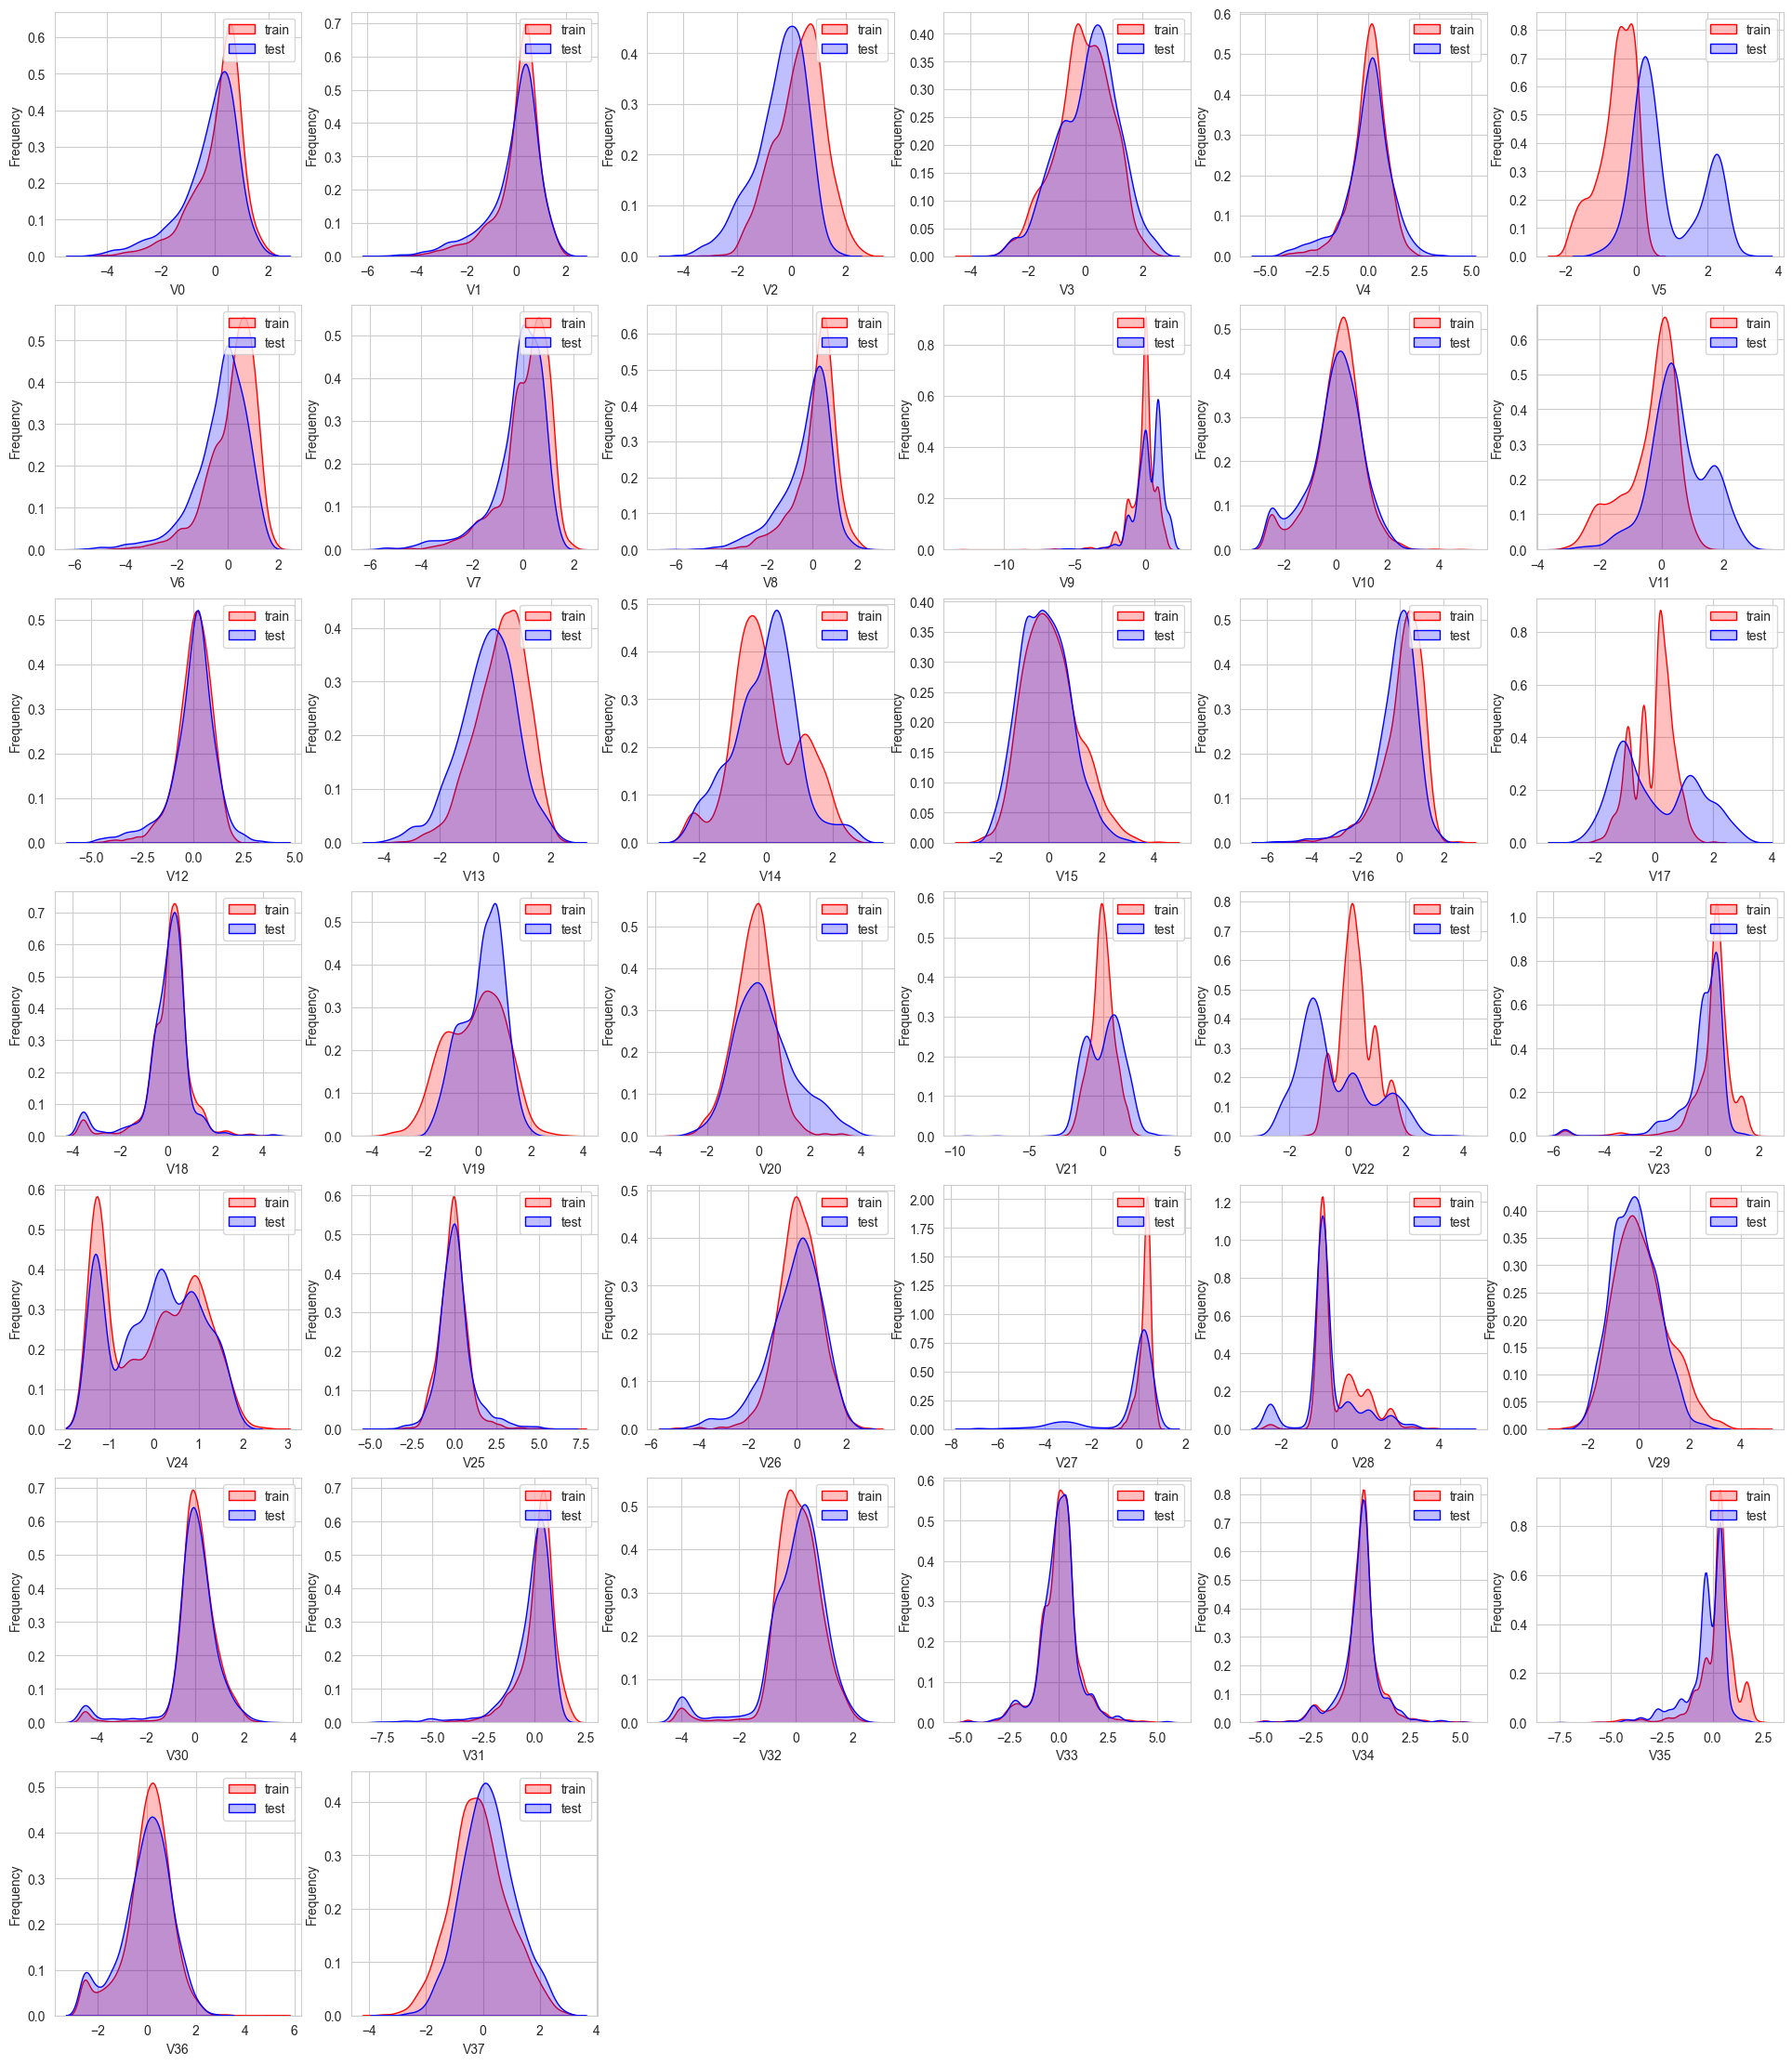

In [13]:
dist_cols = 6
dist_rows = len(test_data.columns)//6 + 1
plt.figure(figsize=(4*dist_cols,4*dist_rows))

i=1
for col in test_data.columns:
    plt.subplot(dist_rows,dist_cols,i)
    
    sns.kdeplot(train_data[col], color="Red", shade=True)
    sns.kdeplot(test_data[col], color="Blue", shade=True)

    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend(["train","test"])
    i+=1

check the data distribution of the feature variables 'V5', 'V17', 'V28', 'V22', 'V11', 'V9'

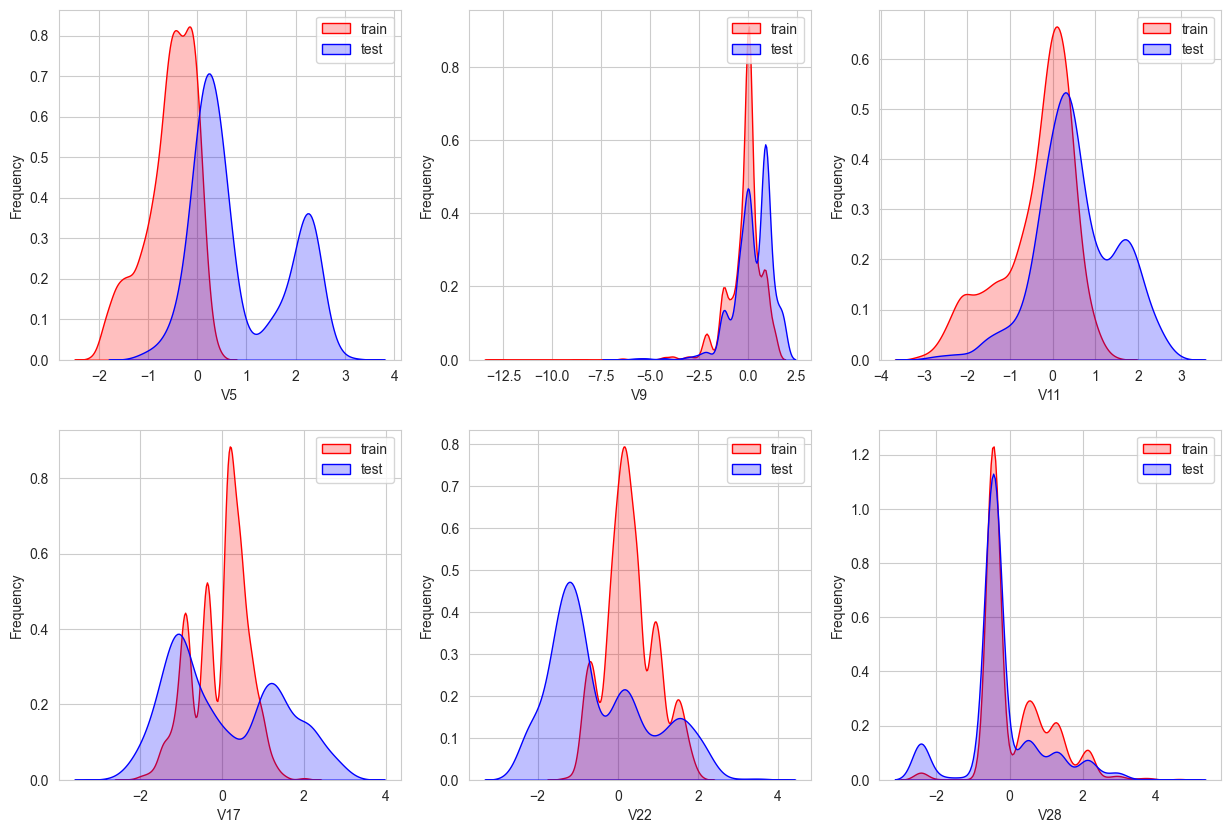

In [14]:
col = 3
row = 2
plt.figure(figsize=(5 * col,5 * row))
i=1
for c in ["V5","V9","V11","V17","V22","V28"]:
    plt.subplot(row,col,i)
    sns.kdeplot(train_data[c], color="Red", shade=True)
    sns.kdeplot(test_data[c], color="Blue", shade=True)
    plt.xlabel(c)
    plt.ylabel("Frequency")
    plt.legend(["train","test"])
    i+=1
plt.show()

### 特征相关性 coefficient of correlation

In [15]:
drop_col_kde = ['V5','V9','V11','V17','V22','V28']
train_data_drop = train_data.drop(drop_col_kde, axis=1)
train_corr = train_data_drop.corr()
train_corr

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
V0,1.000000,0.908607,0.463643,0.409576,0.781212,0.189267,0.141294,0.794013,0.298443,0.751830,...,0.302145,0.156968,0.675003,0.050951,0.056439,-0.019342,0.138933,0.231417,-0.494076,0.873212
V1,0.908607,1.000000,0.506514,0.383924,0.657790,0.276805,0.205023,0.874650,0.310120,0.656186,...,0.147096,0.175997,0.769745,0.085604,0.035129,-0.029115,0.146329,0.235299,-0.494043,0.871846
V2,0.463643,0.506514,1.000000,0.410148,0.057697,0.615938,0.477114,0.703431,0.346006,0.059941,...,-0.275764,0.175943,0.653764,0.033942,0.050309,-0.025620,0.043648,0.316462,-0.734956,0.638878
V3,0.409576,0.383924,0.410148,1.000000,0.315046,0.233896,0.197836,0.411946,0.321262,0.306397,...,0.117610,0.043966,0.421954,-0.092423,-0.007159,-0.031898,0.080034,0.324475,-0.229613,0.512074
V4,0.781212,0.657790,0.057697,0.315046,1.000000,-0.117529,-0.052370,0.449542,0.141129,0.927685,...,0.659093,0.022807,0.447016,-0.026186,0.062367,0.028659,0.100010,0.113609,-0.031054,0.603984
V6,0.189267,0.276805,0.615938,0.233896,-0.117529,1.000000,0.917502,0.468233,0.415660,-0.087312,...,-0.467980,0.188907,0.546535,0.144550,0.054210,-0.002914,0.044992,0.433804,-0.404817,0.370037
V7,0.141294,0.205023,0.477114,0.197836,-0.052370,0.917502,1.000000,0.389987,0.310982,-0.036791,...,-0.311363,0.170113,0.475254,0.122707,0.034508,-0.019103,0.111166,0.340479,-0.292285,0.287815
V8,0.794013,0.874650,0.703431,0.411946,0.449542,0.468233,0.389987,1.000000,0.419703,0.420557,...,-0.011091,0.150258,0.878072,0.038430,0.026843,-0.036297,0.179167,0.326586,-0.553121,0.831904
V10,0.298443,0.310120,0.346006,0.321262,0.141129,0.415660,0.310982,0.419703,1.000000,0.140462,...,-0.105042,-0.036705,0.560213,-0.093213,0.016739,-0.026994,0.026846,0.922190,-0.045851,0.394767
V12,0.751830,0.656186,0.059941,0.306397,0.927685,-0.087312,-0.036791,0.420557,0.140462,1.000000,...,0.666775,0.028866,0.441963,-0.007658,0.046674,0.010122,0.081963,0.112150,-0.054827,0.594189


heatmap of correlation

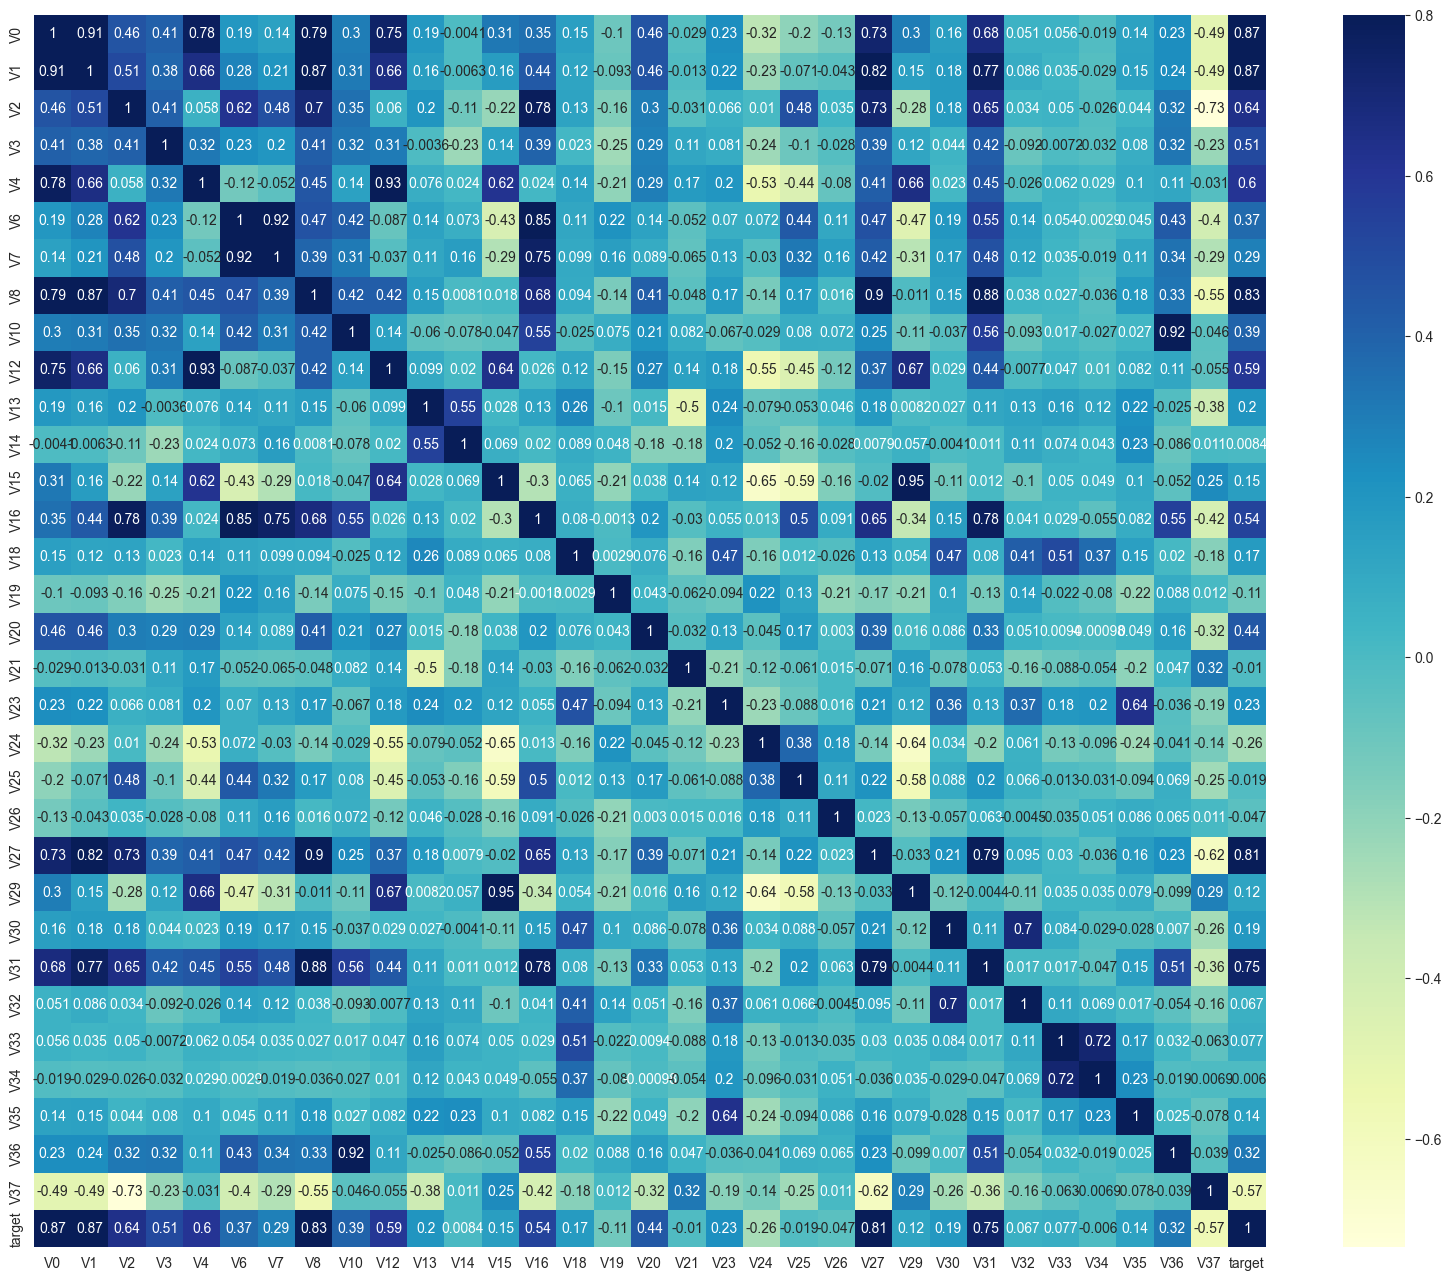

In [16]:
#plot the heatmap of correlation
plt.subplots(figsize=(20, 16))# adjust the size of the drawing object
# annot=True display the data on the heatmap
sns.heatmap(train_corr, vmax=.8, square=True, annot=True, cmap='YlGnBu')
plt.show()

# put a mask on the upper triangle

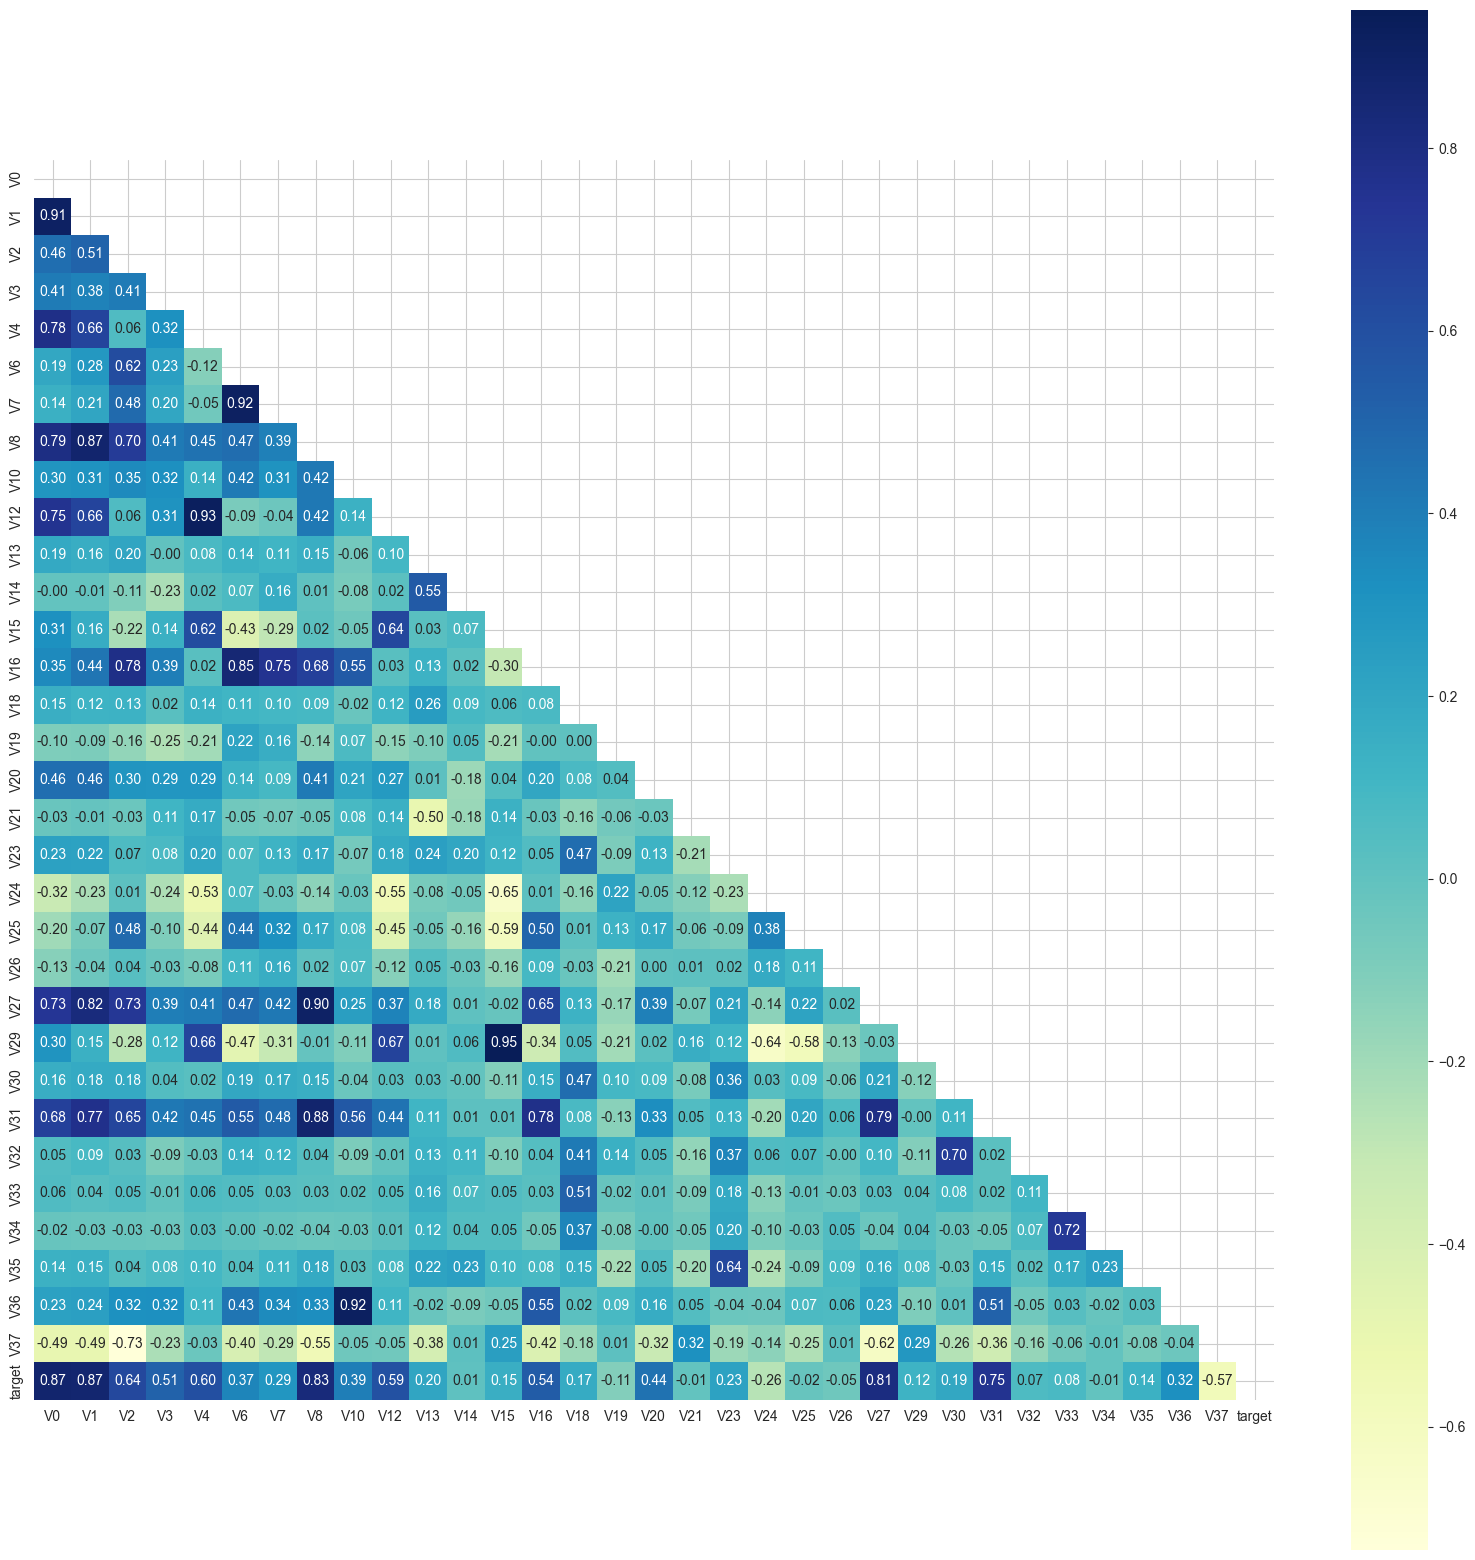

In [17]:
plt.figure(figsize=(20, 20)) 
sns.set_style(style = 'white')
mcorr = train_data_drop.corr()
mask = np.zeros_like(mcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
g = sns.heatmap(mcorr, mask=mask, square=True, annot=True, fmt='0.2f', cmap='YlGnBu')
plt.grid("off")
plt.show()

In [18]:
np.triu_indices_from(mask)

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7, 

In [19]:
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

### feature selection

In [20]:
# drop the feature variables that are not evenly distributed and not normally distributed
train_data.drop(drop_col_kde,axis = 1,inplace=True)
test_data.drop(drop_col_kde,axis = 1,inplace= True)
train_data.head()

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-1.812,-2.360,-0.436,-0.940,-0.073,...,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-1.566,-2.360,0.332,0.188,-0.134,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-1.367,-2.360,0.396,0.874,-0.072,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-1.200,-2.086,0.403,0.011,-0.014,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-1.073,-2.086,0.314,-0.251,0.199,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384


feature selection based on the coefficient of correlation

In [21]:
cond = mcorr['target'].abs() < 0.1

drop_col_corr = mcorr.index[cond]
display(drop_col_corr)

# drop the feature variables that are not closely related to the target
train_data.drop(drop_col_corr,axis = 1,inplace=True)
test_data.drop(drop_col_corr,axis = 1,inplace=True)

display(train_data.head())

Index(['V14', 'V21', 'V25', 'V26', 'V32', 'V33', 'V34'], dtype='object')

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V23,V24,V27,V29,V30,V31,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-1.812,-2.360,-0.436,-0.940,-0.073,...,0.356,0.800,0.168,0.136,0.109,-0.615,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-1.566,-2.360,0.332,0.188,-0.134,...,0.357,0.801,0.338,-0.128,0.124,0.032,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-1.367,-2.360,0.396,0.874,-0.072,...,0.355,0.961,0.326,-0.009,0.361,0.277,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-1.200,-2.086,0.403,0.011,-0.014,...,0.352,1.435,0.277,0.015,0.417,0.279,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-1.073,-2.086,0.314,-0.251,0.199,...,0.352,0.881,0.332,0.183,1.078,0.328,0.364,-0.280,-0.028,0.384


### save the processed data

In [22]:
train_data['label'] = 'train'
test_data['label'] = 'test'

all_data = pd.concat([train_data,test_data])

all_data.to_csv('./processed_data.csv',index = False)
all_data.head()

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V24,V27,V29,V30,V31,V35,V36,V37,target,label
0,0.566,0.016,-0.143,0.407,0.452,-1.812,-2.360,-0.436,-0.940,-0.073,...,0.800,0.168,0.136,0.109,-0.615,-5.101,-2.608,-3.508,0.175,train
1,0.968,0.437,0.066,0.566,0.194,-1.566,-2.360,0.332,0.188,-0.134,...,0.801,0.338,-0.128,0.124,0.032,0.364,-0.335,-0.730,0.676,train
2,1.013,0.568,0.235,0.370,0.112,-1.367,-2.360,0.396,0.874,-0.072,...,0.961,0.326,-0.009,0.361,0.277,0.364,0.765,-0.589,0.633,train
3,0.733,0.368,0.283,0.165,0.599,-1.200,-2.086,0.403,0.011,-0.014,...,1.435,0.277,0.015,0.417,0.279,0.364,0.333,-0.112,0.206,train
4,0.684,0.638,0.260,0.209,0.337,-1.073,-2.086,0.314,-0.251,0.199,...,0.881,0.332,0.183,1.078,0.328,0.364,-0.280,-0.028,0.384,train
